<br><br><center><h1 style="font-size:3em;color:#2467C0">Project: Wrangle and Analyze Data</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://images-na.ssl-images-amazon.com/images/I/71pWJ6cVBIL.jpg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This project is connected with the Wrangling section of the Data Analyst nanodegree program offered by Udacity.The dataset used for wrangling (analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has 4 million followers and has received international media coverage.
<br>
<br>
<br>
Real-world data rarely comes clean. Using Python and its libraries, the goal is to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. All the wrangling efforts are documented in this Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).
<br>
<br>
This Jupyter Notebook was created by: Gustavo Cedeño
</tr>
</table>

## Table of Contents
<ul>
    
<li><a href='#intro'>Introduction</a></li>
    <ul>
      <li><a href='#projectdetails'>Project Details</a></li>
</ul>
    

<li><a href='#wrangling'>Data Wrangling</a></li>
    <ul>
      <li><a href='#gathering'>Gathering Data</a></li>
      <li><a href='#assessing'>Assessing Data</a></li>
      <li><a href='#cleaning'>Cleaning Data</a></li>
</ul>

<li><a href='#eda'>Exploratory Data Analysis</a></li>
    <ul>
      <li><a href='#tweetstrend'>Exploring tweets trend over time</a></li>
      <li><a href='#tweethour'>Hours with the most tweets</a></li>
      <li><a href='#commonnamesbreeds'>Most common Dog names and breeds</a></li>
      <li><a href='#namebreedlikes'>Dog names and breeds with the most likes</a></li>
      <li><a href='#wordclouds'>Visualizations using WordClouds</a></li>
    
   
</ul>  

<a id='intro'></a>
# Introduction

>This project is connected with the Wrangling sectinon of the Data Analyst nanodegree program offered by Udacity.The dataset used for wrangling (analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.
> The goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations, gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. All the wrangling efforts are documented in this Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

<a id='projectdetails'></a>
## Project Details
>Main tasks in this project are as follows:

>Data wrangling, which consists of:
>1. Gathering data
>2. Assessing data
>3. Cleaning data
>4. Storing, analyzing, and visualizing your wrangled data
>5. Reporting on 1) data wrangling efforts and 2) data analyses and visualizations

### Data Source
>1. **Enhanced Twitter Archive**

>The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

>2. **Additional Data via the Twitter API**

>Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

>3. **Image Predictions File**

>One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

### Python Libraries 
<br> For the analysis, the following python libraries are used:
<ul>
<li><b>sqlite3</b> for interacting with a local relational database.</li>
<li><b>pandas</b> and <b>numpy</b> for data ingestion and manipulation.</li>
<li><b>matplotlib</b> and <b>seaborn</b> for data visualization.</li>
<li><b>requests</b> for data gathering using urls.</li>
<li><b>tweepy</b> API used for gathering twitter data.</li>
<li><b>jupyter notebook</b>, for code development and analysis description.</li>
<li><b>json</b>, <b>os</b>, <b>time</b> and <b>pickle</b> for complete the used libraries.</li>
</ul>

In [1]:
# Importing the required packages for the analysis
#visualization will be plotted inline with the notebook and seaborn style is arbitrary set to "darkgrid"
import sqlite3
import pandas as pd
import numpy as np
import requests
import json
import os
import tweepy
import time
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

> >Data wrangling consist in three main tasks:
>1. Gathering data
>2. Assessing data
>3. Cleaning data

### - Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled `wrangle_act.ipynb`:

**The WeRateDogs Twitter archive**. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

**The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (`image_predictions.tsv`) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the **WeRateDogs Twitter archive**, query the **Twitter API** for each tweet's **JSON data** using Python's **Tweepy** library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

### - Assessing Data for this Project
After gathering each of the above pieces of data, assess them **visually and programmatically** for **quality** and **tidiness** issues. Detect and document at least **eight (8) quality issues and two (2) tidiness issues** in your `wrangle_act.ipynb` Jupyter Notebook. 

### - Cleaning Data for this Project
Clean each of the issues you documented while assessing. Perform this cleaning in `wrangle_act.ipynb` as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

<a id='gathering'></a>
# Gathering Data

### 1. WeRateDogs Twitter archive.
Data given as a "file on hand", consisting of a csv file called: `twitter_archive_enhanced.csv`

In [2]:
WRD_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
WRD_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Tweet image predictions - File from Udacity's servers
File with image predictions, that tells what breed of dog(or other object, animal) is present in each tweet according to a neural network. The file is hosted on Udacity's servers and should be downloaded programmatically using the `Requests` library and the given URL. 

**PROCEDURE DESCRIPTION:** Making the request, getting the file, save it as tsv and then open it in a pandas DataFrame to be used for analysis  
- [How to make a Request](http://docs.python-requests.org/en/master/user/quickstart/#make-a-request)
- [Reading and Writing Files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)


In [4]:
#getting the file from Udacity's server and saving it as a tsv file. 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1],mode='wb') as file:
    file.write(r.content)

In [5]:
# Import the image predictions TSV file into a DataFrame
imgp_df = pd.read_csv("image-predictions.tsv", sep='\t')

In [6]:
# Check to see if the file was imported correctly
imgp_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Twitter API for getting tweet's JSON data
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

- [Retrieving Tweets and attributes](https://stackoverflow.com/questions/15628535/how-can-i-retrieve-all-tweets-and-attributes-for-a-given-user-using-python)
- [Populating a pandas DataFrame with tweet strings](https://stackoverflow.com/questions/46554920/tweepy-error-144-when-populating-a-pandas-dataframe-column-with-tweet-strings)
- [Collecting Twitter data with python](https://galeascience.wordpress.com/2016/03/18/collecting-twitter-data-with-python/)
- [tweepy documentation](https://tweepy.readthedocs.io/en/3.7.0/api.html)
- [Rate Limiting](https://developer.twitter.com/en/docs/basics/rate-limiting)
- [Getting tweets with specific id](https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id)
- [How to scrap data from Twitter using Python](https://www.promptcloud.com/blog/scrape-twitter-data-using-python-r/)
- [Writing JSON to a file](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)
- [Converting list of dictionaries to a pandas DataFrame](https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe)
- [How to write JSON data to a file](https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file)
- [Handling Exceptions](https://wiki.python.org/moin/HandlingExceptions)
- [Udacity DAND L2 Gathering Data](https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/aef902cd-59a3-4cd2-af74-2d39b4b03b80/lessons/96402d84-c99d-4982-9edf-2430ef30d222/concepts/8a632dde-1139-4936-8f4e-486d7ea7ae14)
- [Udacity Knowledge](https://knowledge.udacity.com/?nanodegree=5d1a8326-496f-11e8-b51d-0b52a2c1b841&page=1&project=57035e4a-496f-11e8-b3ac-f3eb4d087c25&query=json%20file&sort=RELEVANCE)
- [JSON Encoder](https://docs.python.org/3/library/json.html)

In [7]:
#Connecting to twitter using the tweepy API

consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 wait_on_rate_limit = True,
                   wait_on_rate_limit_notify = True)



### Creating a DataFrame without converting to JSON

In [9]:
#Creating a pandas DataFrame with data extracted from twitter
limit= 0 #for checking if implementation works
df_list = [] # list of dictionaries containing extracted data
errors_list = [] # tweet_ids that return errors


print('Creating a pandas DataFrame from Twitter data')

for tweet_id in WRD_df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id)
        df_list.append({'Tweet_id' : tweet.id,
        'Tweet_text' : tweet.text,
        'retweet_count' : tweet.retweet_count,
        'favorite_count' : tweet.favorite_count,
        'Source' : tweet.source,
        'Created' : tweet.created_at})
        
   
            
    except Exception as e:
        print(str(tweet_id) + "-"+str(e))
        errors_list.append(tweet_id)
        
       
        
        
#Converting the list of dictionaries into a pandas DataFrame        
tweet_df = pd.DataFrame(df_list)
print('Successfully created a pandas DataFrame from Twitter data')

Creating a pandas DataFrame from Twitter data
888202515573088257-[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921-[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937-[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745-[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329-[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744-[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320-[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705-[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648-[{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308-[{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977-[{'code': 144, 'message': 'No status found with that ID.'}]
812747805718642688-[{'code': 144, 'message': 'No status found with that ID.'}]
802247

Rate limit reached. Sleeping for: 627


754011816964026368-[{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288-[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 677


Successfully created a pandas DataFrame from Twitter data


In [10]:
# Checking if the dataframe was successfully created 
tweet_df.head()

,Created,Source,Tweet_id,Tweet_text,favorite_count,retweet_count
0,2017-08-01 16:23:56,Twitter for iPhone,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,37729,8220
1,2017-08-01 00:17:27,Twitter for iPhone,892177421306343426,This is Tilly. She's just checking pup on you....,32392,6077
2,2017-07-31 00:18:03,Twitter for iPhone,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,24395,4021
3,2017-07-30 15:58:51,Twitter for iPhone,891689557279858688,This is Darla. She commenced a snooze mid meal...,41037,8375
4,2017-07-29 16:00:24,Twitter for iPhone,891327558926688256,This is Franklin. He would like you to stop ca...,39232,9080


In [11]:
#Saving the newly created df for later use
file_Name = "tweet_df.pkl"
# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df to the
# file named "df_solution.pkl"
pickle.dump(tweet_df,fileObject)   

# here we close the fileObject
fileObject.close()

In [7]:
#Opening the pickled df 
df_tweet_data = pd.read_pickle("tweet_df.pkl")
df_tweet_data.head()

,Created,Source,Tweet_id,Tweet_text,favorite_count,retweet_count
0,2017-08-01 16:23:56,Twitter for iPhone,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,37729,8220
1,2017-08-01 00:17:27,Twitter for iPhone,892177421306343426,This is Tilly. She's just checking pup on you....,32392,6077
2,2017-07-31 00:18:03,Twitter for iPhone,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,24395,4021
3,2017-07-30 15:58:51,Twitter for iPhone,891689557279858688,This is Darla. She commenced a snooze mid meal...,41037,8375
4,2017-07-29 16:00:24,Twitter for iPhone,891327558926688256,This is Franklin. He would like you to stop ca...,39232,9080


### Creating a DataFrame converting to JSON first

**Description:**

### Getting the tweets and saving them to a .txt file

In [13]:
#initialize the count of tweets, fail dict, and timer
count = 0
fails_dict = {}
start = time.time()
#limit= 0 #for checking if implementation works
#save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:
    
    #loop through each tweet id and write to outfile
    for tweet_id in WRD_df['tweet_id']:
        count += 1
        print(str(count) + ':' + str(tweet_id))
        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)#,sort_keys = True, indent = 4)
            outfile.write('\n')
            #Limit for debugging 
            #limit+=1
            #if limit >=10:
                #break
            
        except tweepy.TweepError as e:
                print("Fail, tweet_id: ", tweet_id)
                fails_dict[tweet_id] = e
                pass

end = time.time()
print('Elapsed time: ',end-start)
print("Tweets with errors: ", fails_dict)

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
Fail, tweet_id:  888202515573088257
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513

Success
263:842765311967449089
Success
264:842535590457499648
Success
265:842163532590374912
Success
266:842115215311396866
Success
267:841833993020538882
Success
268:841680585030541313
Success
269:841439858740625411
Success
270:841320156043304961
Success
271:841314665196081154
Success
272:841077006473256960
Success
273:840761248237133825
Success
274:840728873075638272
Success
275:840698636975636481
Success
276:840696689258311684
Success
277:840632337062862849
Success
278:840370681858686976
Success
279:840268004936019968
Success
280:839990271299457024
Success
281:839549326359670784
Success
282:839290600511926273
Success
283:839239871831150596
Success
284:838952994649550848
Success
285:838921590096166913
Success
286:838916489579200512
Success
287:838831947270979586
Success
288:838561493054533637
Success
289:838476387338051585
Success
290:838201503651401729
Success
291:838150277551247360
Success
292:838085839343206401
Success
293:838083903487373313
Success
294:837820167694528512
Success


Rate limit reached. Sleeping for: 648


Success
326:833863086058651648
Success
327:833826103416520705
Success
328:833732339549220864
Success
329:833722901757046785
Success
330:833479644947025920
Success
331:833124694597443584
Success
332:832998151111966721
Success
333:832769181346996225
Success
334:832757312314028032
Success
335:832682457690300417
Success
336:832645525019123713
Success
337:832636094638288896
Success
338:832397543355072512
Success
339:832369877331693569
Success
340:832273440279240704
Success
341:832215909146226688
Success
342:832215726631055365
Success
343:832088576586297345
Success
344:832040443403784192
Success
345:832032802820481025
Success
346:831939777352105988
Success
347:831926988323639298
Success
348:831911600680497154
Success
349:831670449226514432
Success
350:831650051525054464
Success
351:831552930092285952
Success
352:831322785565769729
Success
353:831315979191906304
Success
354:831309418084069378
Success
355:831262627380748289
Success
356:830956169170665475
Success
357:830583320585068544
Success


Success
588:799757965289017345
Success
589:799422933579902976
Success
590:799308762079035393
Success
591:799297110730567681
Success
592:799063482566066176
Success
593:798933969379225600
Success
594:798925684722855936
Success
595:798705661114773508
Success
596:798701998996647937
Success
597:798697898615730177
Success
598:798694562394996736
Success
599:798686750113755136
Success
600:798682547630837760
Success
601:798673117451325440
Success
602:798665375516884993
Success
603:798644042770751489
Success
604:798628517273620480
Success
605:798585098161549313
Success
606:798576900688019456
Success
607:798340744599797760
Success
608:798209839306514432
Success
609:797971864723324932
Success
610:797545162159308800
Success
611:797236660651966464
Success
612:797165961484890113
Success
613:796904159865868288
Success
614:796865951799083009
Success
615:796759840936919040
Success
616:796563435802726400
Success
617:796484825502875648
Success
618:796387464403357696
Success
619:796177847564038144
Success


Success
851:765719909049503744
Success
852:765669560888528897
Success
853:765395769549590528
Success
854:765371061932261376
Success
855:765222098633691136
Success
856:764857477905154048
Success
857:764259802650378240
Success
858:763956972077010945
Success
859:763837565564780549
Success
860:763183847194451968
Success
861:763167063695355904
Success
862:763103485927849985
Success
863:762699858130116608
Success
864:762471784394268675
Success
865:762464539388485633
Success
866:762316489655476224
Success
867:762035686371364864
Success
868:761976711479193600
Success
869:761750502866649088
Success
870:761745352076779520
Success
871:761672994376806400
Success
872:761599872357261312
Success
873:761371037149827077
Success
874:761334018830917632
Success
875:761292947749015552
Success
876:761227390836215808
Success
877:761004547850530816
Success
878:760893934457552897
Success
879:760656994973933572
Success
880:760641137271070720
Success
881:760539183865880579
Success
882:760521673607086080
Success


Success
1111:733822306246479872
Success
1112:733482008106668032
Success
1113:733460102733135873
Success
1114:733109485275860992
Success
1115:732732193018155009
Success
1116:732726085725589504
Success
1117:732585889486888962
Success
1118:732375214819057664
Success
1119:732005617171337216
Success
1120:731285275100512256
Success
1121:731156023742988288
Success
1122:730924654643314689
Success
1123:730573383004487680
Success
1124:730427201120833536
Success
1125:730211855403241472
Success
1126:730196704625098752
Success
1127:729854734790754305
Success
1128:729838605770891264
Success
1129:729823566028484608
Success
1130:729463711119904772
Success
1131:729113531270991872
Success
1132:728986383096946689
Success
1133:728760639972315136
Success
1134:728751179681943552
Success
1135:728653952833728512
Success
1136:728409960103686147
Success
1137:728387165835677696
Success
1138:728046963732717569
Success
1139:728035342121635841
Success
1140:728015554473250816
Success
1141:727685679342333952
Success


Rate limit reached. Sleeping for: 692


Success
1226:714141408463036416
Success
1227:713919462244790272
Success
1228:713909862279876608
Success
1229:713900603437621249
Success
1230:713761197720473600
Success
1231:713411074226274305
Success
1232:713177543487135744
Success
1233:713175907180089344
Success
1234:712809025985978368
Success
1235:712717840512598017
Success
1236:712668654853337088
Success
1237:712438159032893441
Success
1238:712309440758808576
Success
1239:712097430750289920
Success
1240:712092745624633345
Success
1241:712085617388212225
Success
1242:712065007010385924
Success
1243:711998809858043904
Success
1244:711968124745228288
Success
1245:711743778164514816
Success
1246:711732680602345472
Success
1247:711694788429553666
Success
1248:711652651650457602
Success
1249:711363825979756544
Success
1250:711306686208872448
Success
1251:711008018775851008
Success
1252:710997087345876993
Success
1253:710844581445812225
Success
1254:710833117892898816
Success
1255:710658690886586372
Success
1256:710609963652087808
Success


Success
1483:693267061318012928
Success
1484:693262851218264065
Success
1485:693231807727280129
Success
1486:693155686491000832
Success
1487:693109034023534592
Success
1488:693095443459342336
Success
1489:692919143163629568
Success
1490:692905862751522816
Success
1491:692901601640583168
Success
1492:692894228850999298
Success
1493:692828166163931137
Success
1494:692752401762250755
Success
1495:692568918515392513
Success
1496:692535307825213440
Success
1497:692530551048294401
Success
1498:692423280028966913
Success
1499:692417313023332352
Success
1500:692187005137076224
Success
1501:692158366030913536
Success
1502:692142790915014657
Success
1503:692041934689402880
Success
1504:692017291282812928
Success
1505:691820333922455552
Success
1506:691793053716221953
Success
1507:691756958957883396
Success
1508:691675652215414786
Success
1509:691483041324204033
Success
1510:691459709405118465
Success
1511:691444869282295808
Success
1512:691416866452082688
Success
1513:691321916024623104
Success


Success
1739:679527802031484928
Success
1740:679511351870550016
Success
1741:679503373272485890
Success
1742:679475951516934144
Success
1743:679462823135686656
Success
1744:679405845277462528
Success
1745:679158373988876288
Success
1746:679148763231985668
Success
1747:679132435750195208
Success
1748:679111216690831360
Success
1749:679062614270468097
Success
1750:679047485189439488
Success
1751:679001094530465792
Success
1752:678991772295516161
Success
1753:678969228704284672
Success
1754:678800283649069056
Success
1755:678798276842360832
Success
1756:678774928607469569
Success
1757:678767140346941444
Success
1758:678764513869611008
Success
1759:678755239630127104
Success
1760:678740035362037760
Success
1761:678708137298427904
Success
1762:678675843183484930
Success
1763:678643457146150913
Success
1764:678446151570427904
Success
1765:678424312106393600
Success
1766:678410210315247616
Success
1767:678399652199309312
Success
1768:678396796259975168
Success
1769:678389028614488064
Success


Success
1996:672594978741354496
Success
1997:672591762242805761
Success
1998:672591271085670400
Success
1999:672538107540070400
Success
2000:672523490734551040
Success
2001:672488522314567680
Success
2002:672482722825261057
Success
2003:672481316919734272
Success
2004:672475084225949696
Success
2005:672466075045466113
Success
2006:672272411274932228
Success
2007:672267570918129665
Success
2008:672264251789176834
Success
2009:672256522047614977
Success
2010:672254177670729728
Success
2011:672248013293752320
Success
2012:672245253877968896
Success
2013:672239279297454080
Success
2014:672231046314901505
Success
2015:672222792075620352
Success
2016:672205392827572224
Success
2017:672169685991993344
Success
2018:672160042234327040
Success
2019:672139350159835138
Success
2020:672125275208069120
Success
2021:672095186491711488
Success
2022:672082170312290304
Success
2023:672068090318987265
Success
2024:671896809300709376
Success
2025:671891728106971137
Success
2026:671882082306625538
Success


Rate limit reached. Sleeping for: 692


Success
2125:670374371102445568
Success
2126:670361874861563904
Success
2127:670338931251150849
Success
2128:670319130621435904
Success
2129:670303360680108032
Success
2130:670290420111441920
Success
2131:670093938074779648
Success
2132:670086499208155136
Success
2133:670079681849372674
Success
2134:670073503555706880
Success
2135:670069087419133954
Success
2136:670061506722140161
Success
2137:670055038660800512
Success
2138:670046952931721218
Success
2139:670040295598354432
Success
2140:670037189829525505
Success
2141:670003130994700288
Success
2142:669993076832759809
Success
2143:669972011175813120
Success
2144:669970042633789440
Success
2145:669942763794931712
Success
2146:669926384437997569
Success
2147:669923323644657664
Success
2148:669753178989142016
Success
2149:669749430875258880
Success
2150:669684865554620416
Success
2151:669683899023405056
Success
2152:669682095984410625
Success
2153:669680153564442624
Success
2154:669661792646373376
Success
2155:669625907762618368
Success


In [8]:
#Creating a pandas DataFrame (extracting only relevant data)
df_tweet = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

for line in open('tweet_json.txt','r'):
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_tweet = df_tweet.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
df_tweet = df_tweet.reset_index(drop=True)
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8220,37729
1,892177421306343426,6077,32392
2,891815181378084864,4021,24395
3,891689557279858688,8375,41037
4,891327558926688256,9080,39232


In [9]:
df_tweet.shape

(2339, 3)

  <a id='assessing'></a>
  # Assessing Data

> After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least **eight (8) quality issues** and **two (2) tidiness issues** in your `wrangle_act.ipynb` Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

### Assessing WeRateDogs twitter archive
- [Rating System](https://knowyourmeme.com/memes/theyre-good-dogs-brent)
- [Tidy_data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)

In [10]:
#Checking the WeRateDogs Twitter archive
WRD_df.head(3)  # - Missing values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [11]:
WRD_df['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [12]:
WRD_df.info() #- timestamp is string and not time value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
WRD_df.describe() #rating num/denom max values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
WRD_df.isnull().any()# Several columns with missing values

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [21]:
WRD_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
21,887705289381826560,NaN,NaN,2017-07-19 16:06:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He has a monopoly on the pool...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887705289...,13,10,Jeffrey,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371...,10,10,Trip,None,None,pupper,None
1911,674410619106390016,NaN,NaN,2015-12-09 02:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674410619...,10,10,Lenny,None,None,None,None
738,780800785462489090,NaN,NaN,2016-09-27 16:06:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He has a weird relationship with...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780800785...,11,10,Koda,None,None,None,None


In [22]:
WRD_df['name'].value_counts() #-Several dogs without name some dogs with name "a","the","an"

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
the              8
Sadie            8
Buddy            7
Toby             7
Daisy            7
Bailey           7
an               7
Dave             6
Bella            6
Stanley          6
Koda             6
Oscar            6
Leo              6
Milo             6
Rusty            6
Jax              6
Scout            6
Jack             6
Bentley          5
              ... 
Tedrick          1
Mookie           1
Rizzo            1
Kathmandu        1
Robin            1
by               1
Sojourner        1
Clyde            1
Cuddles          1
Corey            1
Jareld           1
Kevon            1
Hermione         1
Ralphy           1
Florence         1
Lupe             1
Walker           1
Sailor           1
Fillup           1
Ralphus          1
Dallas           1
Brian       

In [23]:
WRD_df.rating_denominator.max() #Max should be 10

170

In [24]:
WRD_df['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [25]:
WRD_df[WRD_df['rating_denominator']>10].shape[0] #20 values over 10

20

In [26]:
WRD_df.rating_numerator.max() #Such a big rating doesn't make sense

1776

In [27]:
WRD_df['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [28]:
WRD_df[WRD_df['rating_numerator']>99].shape[0] #I think that such high ratings should not be considered  

11

### Assessing the image predictions file

In [13]:
imgp_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
imgp_df.info() #Apparently no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
imgp_df.sample(10) #Some pictures area classified as not dogs

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
967,706310011488698368,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,1,Pembroke,0.698165,True,Chihuahua,0.105834,True,bloodhound,0.062030,True
2009,878281511006478336,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1,basset,0.320420,True,collie,0.215975,True,Appenzeller,0.128507,True
838,694352839993344000,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True
940,703774238772166656,https://pbs.twimg.com/media/CcRO8FmW4AAzazk.jpg,1,Labrador_retriever,0.990119,True,Chesapeake_Bay_retriever,0.008026,True,curly-coated_retriever,0.001242,True
1326,757354760399941633,https://pbs.twimg.com/media/CoKqIndWgAAattd.jpg,1,Italian_greyhound,0.914667,True,whippet,0.047774,True,ice_lolly,0.015477,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1023,710283270106132480,https://pbs.twimg.com/media/Cdtu3WRUkAAsRVx.jpg,2,Shih-Tzu,0.932401,True,Lhasa,0.030806,True,Tibetan_terrier,0.008974,True
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True


In [32]:
imgp_df.query('p1_dog == False & p2_dog == False & p3_dog == False').head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,0.114071,False,common_iguana,0.043255,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False


In [33]:
imgp_df.query('p1_dog == False & p2_dog == False & p3_dog == False').shape[0] #Pictures classified as no dogs by p1,p2,p3

324

In [34]:
imgp_df[imgp_df.p1_dog == False]['tweet_id'].count() #543 not dogs by p1

543

In [35]:
imgp_df.tweet_id.nunique() #No repeated tweet-ids

2075

### Assessing the Twitter API additional data

In [15]:
df_tweet.info() #JSON generated DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null object
favorite_count    2339 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


In [37]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8220,37729
1,892177421306343426,6077,32392
2,891815181378084864,4021,24395
3,891689557279858688,8375,41037
4,891327558926688256,9080,39232


In [38]:
df_tweet.nunique()

tweet_id          2339
retweet_count     1719
favorite_count    2014
dtype: int64

In [39]:
df_tweet.isnull().any()

tweet_id          False
retweet_count     False
favorite_count    False
dtype: bool

In [40]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2339,2339,2339
unique,2339,1719,2014
top,687476254459715584,862,0
freq,1,5,167


## Quality
**Data Quality Dimensions**
- **Completeness:** No missing records!
- **Vality:**  Valid data, no repeated primary keys, correct values, etc 
- **Accuracy:** wrong data that is valid 
- **Consistency:** use of standard format

#### `WeRateDogs` DataFrame
 1. tweed_id should be converted to string because it doesn't represent a numeric value intended to perform calculations. 
 2. Several columns with missing values:Completeness issue, these columns cannot be used for analysis. 
 3. timestamp data type is string.Data type is inconsistent with what the data represent and should be converted to timestamp.
 4. Several dogs without name.Incomplete data that cannot be used for analysis. 
 5. Some dogs with name "a","the","an". Incorrect values, very unlikely to be dog names.
 6. 20 Rating-denominators greater than 10. No valid data since the rating scale is 10 and different values have no meaning. 
 7. Text should contain comments only, no urls!

#### `Image-Predictions` DataFrame
 8. tweed_id should be converted to string because it doesn't represent a numeric value intended to perform calculations.
 9. Some breed names are lowercase other proper(first letter uppercase). Inconsistent data without a standard format. 

##### `Twitter API` DataFrame
 10. retweet_count and favorite_count should be converted to int64 (needed for performing calculations during the analysis)

## Tidiness
1. Several columns representing dog stages.Column headers should represent values and not variable names ('Dog_Stage' column containing data with classification: doggo,floofer,pupper,puppo)
2. Data spread over three different dataframes. All the important data should be contained in one single DataFrame ('tweet_id','img-url','breed','timestamp','text','rating-numerator','rating-denominator','name', 'dog-stage','retweet-count','favorite_count'(likes!))

<a id='cleaning'></a>
# Cleaning Data
[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

>Clean each of the issues you documented while assessing. Perform this cleaning in `wrangle_act.ipynb` as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

In [34]:
#Copies of the original(raw) DataFrames
df_WeRateDogs_clean = WRD_df.copy()
df_imgpredict_clean = imgp_df.copy()
df_twitter_API_clean = df_tweet.copy()

In [35]:
df_WeRateDogs_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [36]:
df_imgpredict_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [37]:
df_twitter_API_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8220,37729
1,892177421306343426,6077,32392


### Quality_Issue 1:  `WeRateDogs` DataFrame  
 1. tweed_id should be converted to string because it doesn't represent a numeric value intended to perform calculations.

>**Define:** Convert data type to string(object)

In [38]:
#converting integer to string
df_WeRateDogs_clean['tweet_id'] = df_WeRateDogs_clean['tweet_id'].astype('object')
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Quality_Issue 2:  `WeRateDogs` DataFrame  
 2. Several columns with missing values

>**Define:** Drop features that aren't consistent, have to many missing values or are not relevant for the analysis. 

**Columns to drop:** `in_reply_to_status_id`, `in_reply_to_user_id`, `source`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`, `expanded_urls`

[pandas' drop function.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)


In [39]:
df_WeRateDogs_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [40]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [41]:
#Missing data
df_WeRateDogs_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

>**Code:** Columns to drop: `in_reply_to_status_id`, `in_reply_to_user_id`, `source`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`, `expanded_urls`

In [42]:
# drop extraneous columns from WeRateDogs dataset
df_WeRateDogs_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id',
                          'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'
                         ], axis=1, inplace=True)

# confirm changes
df_WeRateDogs_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


### Quality_Issue 3:  `WeRateDogs` DataFrame  
 3. timestamp is string and not time value
 
- [Time series/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- [pandas.DataFrame.astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html#pandas.DataFrame.astype)
- [Converting datframe column from string to datetime](https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime)
- [Working with date and time using pandas](https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/)

>**Define:** Convert timestamp from string to datetime type for easy manipulation during analysis

>**Code:** 

In [43]:
#converting string to datetime 
df_WeRateDogs_clean['timestamp'] = df_WeRateDogs_clean['timestamp'].astype('datetime64[ns]')

In [44]:
#check the if successful 
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 184.1+ KB


In [45]:
df_WeRateDogs_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [46]:
#Getting the year
df_WeRateDogs_clean['timestamp'].dt.year.head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: timestamp, dtype: int64

In [47]:
#Getting the month
df_WeRateDogs_clean['timestamp'].dt.month.head()

0    8
1    8
2    7
3    7
4    7
Name: timestamp, dtype: int64

In [48]:
df_WeRateDogs_clean['timestamp'].dt.weekday_name.head() 

0     Tuesday
1     Tuesday
2      Monday
3      Sunday
4    Saturday
Name: timestamp, dtype: object

### Quality_Issues 4 + 5:  `WeRateDogs` DataFrame  

 4. Several dogs without name 
 5. some dogs with name "a","an","the"
 
 
 - [drop rows by conditions](https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/)
 - [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
 - [dropping columns and rows](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/)
 - [dropping by multiple conditions](https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression/13851602)

In [49]:
df_WeRateDogs_clean['name'].value_counts().head() #-Several dogs without name and some dogs with name "a"

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

>**Define:** Delete all the rows without a dog name or where the name is "a"

>**Code:** 

In [50]:
#Dropping all the rows without a dog name
df_WeRateDogs_clean.drop(df_WeRateDogs_clean[df_WeRateDogs_clean.name == 'None'].index, inplace=True)

In [51]:
#Check that there are no 'None' dog names
df_WeRateDogs_clean['name'].value_counts()

a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Bailey        7
an            7
Toby          7
Buddy         7
Milo          6
Bella         6
Leo           6
Koda          6
Rusty         6
Jax           6
Oscar         6
Dave          6
Scout         6
Stanley       6
Jack          6
Finn          5
Larry         5
             ..
Burt          1
Clyde         1
Chloe         1
Petrick       1
Rooney        1
Gordon        1
Sephie        1
Walker        1
Heinrich      1
Sojourner     1
Amber         1
Bauer         1
Zoe           1
Chase         1
Mookie        1
Sweet         1
Mosby         1
Horace        1
Kial          1
Maude         1
Strudel       1
Eriq          1
Livvie        1
Tove          1
Poppy         1
Batdog        1
Lilah         1
Kaia          1
Lenox         1
Rinna         1
Name: name, Length: 956,

In [52]:
#Dropping all the rows with dog name = "a", "an","the"
df_WeRateDogs_clean.drop(df_WeRateDogs_clean[df_WeRateDogs_clean.name == 'a'].index, inplace=True)
df_WeRateDogs_clean.drop(df_WeRateDogs_clean[df_WeRateDogs_clean.name == 'an'].index, inplace=True)
df_WeRateDogs_clean.drop(df_WeRateDogs_clean[df_WeRateDogs_clean.name == 'the'].index, inplace=True)

In [53]:
#Check that there are no 'a','an','the' dog names
names =['a','an','the']
S=0
for c in names:
    df_test = df_WeRateDogs_clean[df_WeRateDogs_clean.name == c]
    S = S + df_test.shape[0]
print("Number of dog_names 'a','an','the': {}".format(S))

Number of dog_names 'a','an','the': 0


### Quality_Issue 6:  `WeRateDogs` DataFrame  
6. 20 Rating-denominators different than 10

>**Define:** Change the value of the records having a denominator greater or less than 10 to 10

>**Code:** 

In [54]:
df_WeRateDogs_clean[df_WeRateDogs_clean['rating_denominator']>10].head() 

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,204,170,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is i...,7,11,Darrel,None,None,None,None


In [55]:
df_WeRateDogs_clean.loc[df_WeRateDogs_clean['rating_denominator']!= 10]['rating_denominator']

516       7
1120    170
1202     50
1662     11
Name: rating_denominator, dtype: int64

In [56]:
df_WeRateDogs_clean['rating_denominator'] = 10

In [57]:
df_WeRateDogs_clean[df_WeRateDogs_clean['rating_denominator']>10].head() #Should be empty

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [64]:
df_WeRateDogs_clean['rating_denominator'].describe()

count    1541.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [58]:
df_WeRateDogs_clean.head() #Just to check how the dataframe looks like after some cleanning 

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Quality_Issue 7:  `WeRateDogs` DataFrame  
 7. Text should contain comments only, no urls, newlines!
 
 
 - [pandas.Series.str.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html)
 - [removing urls row by row ](https://stackoverflow.com/questions/45395676/remove-a-url-row-by-row-from-a-large-set-of-text-in-python-panda-dataframe)
 - [Text cleaning with regex](https://codereview.stackexchange.com/questions/186614/text-cleaning-script-producing-lowercase-words-with-minimal-punctuation)

>**Define:** Delete urls,fractions and new lines from the text

>**Code:** 

In [59]:
#before cleaning
df_WeRateDogs_clean.loc[:,'text'][6]  

'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl'

In [60]:
#Removing urls
url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
df_WeRateDogs_clean['text'] = df_WeRateDogs_clean['text'].replace(url_pattern,'',regex=True)

In [61]:
df_WeRateDogs_clean.loc[:,'text'][6]

'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n '

In [62]:
# regex to match fractions
pattern = "\s*(\d+([.]\d+)?([/]\d+))"
df_WeRateDogs_clean['text'] = df_WeRateDogs_clean['text'].replace(pattern,'',regex=True)

In [63]:
df_WeRateDogs_clean.loc[:,'text'][6] #Should be no numbers

'Meet Jax. He enjoys ice cream so much he gets nervous around it. help Jax enjoy more things by clicking below\n\n '

In [64]:
#Removing new lines
df_WeRateDogs_clean['text'] = df_WeRateDogs_clean['text'].replace(r'\n',' ',regex=True)

In [65]:
df_WeRateDogs_clean.loc[:,'text'][6] #Check the clean text

'Meet Jax. He enjoys ice cream so much he gets nervous around it. help Jax enjoy more things by clicking below   '

In [66]:
#Cleaned dataframe so far
df_WeRateDogs_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### `Image-Predictions` DataFrame
Some images are not dog images. Even though this is not a quality issue, the data is irrelevant for the analysis. 

>**Define:** Delete records not classified as dog images

>**Code:** 

In [67]:
df_imgpredict_clean[df_imgpredict_clean.p1_dog == False]['tweet_id'].count() #543 not dogs by p1

543

In [68]:
df_imgpredict_clean.drop(df_imgpredict_clean[df_imgpredict_clean.p1_dog == False].index,inplace=True)

In [69]:
#Confirming there are no images classified as not dogs
df_imgpredict_clean[df_imgpredict_clean.p1_dog == False]['tweet_id'].count() #543 not dogs by p1

0

### Quality_Issue 8: `Image-Predictions` DataFrame
8. tweed_id should be converted to string because it doesn't represent a numeric value intended to perform calculations.

>**Define:** Convert data type to string(object)

In [70]:
#converting integer to string
df_imgpredict_clean['tweet_id'] = df_imgpredict_clean['tweet_id'].astype('object')
df_imgpredict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null object
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 124.2+ KB


### Quality_Issue 9: `Image-Predictions` DataFrame
 9. Some breed names are lowercase other lower and upper case
 
 
 - [pandas.Series.str.title](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html)
 - [pandas series lower upper title](https://www.geeksforgeeks.org/python-pandas-series-str-lower-upper-and-title/)

>**Define:** Convert all the breed names to Camel case(first character of each word to uppercase and remaining to lowercase.)

>**Code:** 

In [71]:
df_imgpredict_clean['p1'] = df_imgpredict_clean['p1'].str.title()
df_imgpredict_clean['p1']

0            Welsh_Springer_Spaniel
1                           Redbone
2                   German_Shepherd
3               Rhodesian_Ridgeback
4                Miniature_Pinscher
5              Bernese_Mountain_Dog
7                              Chow
9                  Miniature_Poodle
10                 Golden_Retriever
11                    Gordon_Setter
12                     Walker_Hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English_Setter
19                Italian_Greyhound
20                      Maltese_Dog
23                 Golden_Retriever
24                         Malamute
26      Soft-Coated_Wheaten_Terrier
27                        Chihuahua
28          Black-And-Tan_Coonhound
30                      Toy_Terrier
31                 Blenheim_Spaniel
32                         Pembroke
34         Chesapeake_Bay_Retriever
35                        Chihuahua
36           Curly-Coated_Re

In [72]:
df_imgpredict_clean['p2'] = df_imgpredict_clean['p2'].str.title()
df_imgpredict_clean['p2']

0                         Collie
1             Miniature_Pinscher
2                       Malinois
3                        Redbone
4                     Rottweiler
5               English_Springer
7                Tibetan_Mastiff
9                       Komondor
10               Tibetan_Mastiff
11             Yorkshire_Terrier
12              English_Foxhound
13                  Bull_Mastiff
14               German_Shepherd
15                      Shih-Tzu
16                  Newfoundland
19                   Toy_Terrier
20                    Toy_Poodle
23      Chesapeake_Bay_Retriever
24                Siberian_Husky
26                  Afghan_Hound
27                   Toy_Terrier
28                    Bloodhound
30                      Papillon
31                Cocker_Spaniel
32                          Chow
34                     Chain_Saw
35                        Beagle
36               Giant_Schnauzer
37            Labrador_Retriever
38                      Pembroke
          

In [79]:
df_imgpredict_clean['p3'] = df_imgpredict_clean['p3'].str.title()
df_imgpredict_clean['p3']

0                 Shetland_Sheepdog
1               Rhodesian_Ridgeback
2                        Bloodhound
3                Miniature_Pinscher
4                          Doberman
5        Greater_Swiss_Mountain_Dog
7                          Fur_Coat
9       Soft-Coated_Wheaten_Terrier
10               Labrador_Retriever
11                         Pekinese
12                     Ibizan_Hound
13                   French_Bulldog
14                         Malinois
15                   Dandie_Dinmont
16                           Borzoi
19                          Basenji
20                 Miniature_Poodle
23               Labrador_Retriever
24                       Eskimo_Dog
26                           Briard
27                         Papillon
28            Flat-Coated_Retriever
30                        Chihuahua
31                         Shih-Tzu
32                       Pomeranian
34                      Power_Drill
35                           Saluki
36               Labrador_Re

In [73]:
df_imgpredict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality_Issue 10 `Twitter API` DataFrame
 10. retweet_count and favorite_count should be converted to int64 (needed for performing calculations during the analysis)

**Define:** Convert retweet count and favorite_count to int64 for calculations

In [104]:
#converting string to integer
df_twitter_API_clean['retweet_count'] = df_twitter_API_clean['retweet_count'].astype('int64')
df_twitter_API_clean['favorite_count'] = df_twitter_API_clean['favorite_count'].astype('int64')
df_twitter_API_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


### Tidiness_Issue 1
1. Several columns in `WeRateDogs` DataFrame representing dog stages.Column headers should represent values and not variable names (create a 'dog_stage' column containing data with classification: doggo,floofer,pupper,puppo.Extract more data from text)


- [Selecting Pandas DataFrame Rows based on Conditions](https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/)
- [Conditional Logic on Pandas DataFrame](https://stackoverflow.com/questions/14714181/conditional-logic-on-pandas-dataframe)

>**Define:** Create a dog stage column, extract addtitional data from text, verify it matches original classification and drop the *doggo*, *floofer*, *pupper* and *puppo* columns.

>**Code:** 

In [105]:
doggo = df_WeRateDogs_clean['doggo'] =='doggo'
floofer = df_WeRateDogs_clean['floofer']=='floofer'
pupper = df_WeRateDogs_clean['pupper']=='pupper'
puppo = df_WeRateDogs_clean['puppo']=='puppo'
df_WeRateDogs_clean[doggo | floofer | pupper | puppo].shape[0] #Number of records having a defined category 

214

In [106]:
df_WeRateDogs_clean.shape[0] #Most records do not have a proper stage category

1541

In [107]:
not_doggo = df_WeRateDogs_clean['doggo'] =='None'
not_floofer = df_WeRateDogs_clean['floofer']=='None'
not_pupper = df_WeRateDogs_clean['pupper']=='None'
not_puppo = df_WeRateDogs_clean['puppo']=='None'
df_WeRateDogs_clean[not_doggo & not_floofer & not_pupper & not_puppo].shape[0] #records in which all dog_stages are None

1327

In [108]:
#Extract additional data from text
df_WeRateDogs_clean['dog_stage'] = df_WeRateDogs_clean['text'].str.extract('(doggopupper|doggopuppo|doggofloofer|puppo|pupper|floofer|doggo)', expand=True)

In [109]:
# Handling multiple stages
df_WeRateDogs_clean.loc[df_WeRateDogs_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df_WeRateDogs_clean.loc[df_WeRateDogs_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df_WeRateDogs_clean.loc[df_WeRateDogs_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
# Handling missing values
df_WeRateDogs_clean.loc[df_WeRateDogs_clean.dog_stage == '', 'dog_stage'] = np.nan

In [111]:
df_WeRateDogs_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1536,689905486972461056,2016-01-20 20:21:00,Say hello to Gizmo. He's quite the pupper. Con...,11,10,Gizmo,None,None,pupper,None,pupper
2162,669393256313184256,2015-11-25 05:52:43,Meet Ronduh. She's a Finnish Checkered Blitzkr...,10,10,Ronduh,None,None,None,None,NaN
581,800443802682937345,2016-11-20 21:00:48,RT @dog_rates: This is Sampson. He's about to ...,11,10,Sampson,None,None,pupper,None,pupper
1995,672594978741354496,2015-12-04 01:55:13,Meet Scott. Just trying to catch his train to ...,9,10,Scott,None,None,pupper,None,pupper
530,808134635716833280,2016-12-12 02:21:26,RT @dog_rates: This is Milo. I would do terrib...,13,10,Milo,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN
76,878057613040115712,2017-06-23 01:10:23,This is Emmy. She was adopted today. Massive r...,14,10,Emmy,None,None,None,None,NaN
2309,666804364988780544,2015-11-18 02:25:23,This is Jockson. He is a Pinnacle Sagittarius....,8,10,Jockson,None,None,None,None,NaN
43,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,None,None,None,doggo
903,758405701903519748,2016-07-27 20:56:24,This is Odie. He falls asleep wherever he want...,10,10,Odie,None,None,None,None,NaN


In [112]:
df_WeRateDogs_clean['dog_stage'].value_counts()#.sum() #221 categorized 'dog_stages' / only 5 more!

pupper     143
doggo       50
puppo       24
floofer      2
Name: dog_stage, dtype: int64

In [86]:
df_WeRateDogs_clean[df_WeRateDogs_clean['dog_stage'] =='puppo'].loc[:,'text':]

,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
14,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,None,None,None,puppo,puppo
85,"Meet Venti, a seemingly caffeinated puppoccino...",13,10,Venti,None,None,None,None,puppo
94,This is Sebastian. He can't see all the colors...,13,10,Sebastian,None,None,None,puppo,puppo
106,Say hello to Lassie. She's celebrating #PrideM...,13,10,Lassie,None,None,None,None,puppo
129,This is Shikha. She just watched you drop a sk...,12,10,Shikha,None,None,None,puppo,puppo
134,This is Lili. She can't believe you betrayed h...,12,10,Lili,None,None,None,None,puppo
296,This is Lucy. She has a portrait of herself on...,13,10,Lucy,None,None,None,None,puppo
397,RT @dog_rates: Say hello to Pablo. He's one go...,12,10,Pablo,None,None,None,puppo,puppo
398,Say hello to Pablo. He's one gorgeous puppo. A...,12,10,Pablo,None,None,None,puppo,puppo
438,RT @dog_rates: This is Oliver. He has dreams o...,13,10,Oliver,None,None,None,puppo,puppo


In [87]:
df_WeRateDogs_clean[df_WeRateDogs_clean['dog_stage'] =='floofer'].loc[:,'text':]

,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
46,Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,None,floofer,None,None,floofer
582,This is Doc. He takes time out of every day to...,12,10,Doc,None,floofer,None,None,floofer


In [113]:
df_WeRateDogs_clean[df_WeRateDogs_clean['dog_stage'] =='pupper'].loc[:,'text':]

,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
29,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,None,None,pupper,None,pupper
49,This is Gus. He's quite the cheeky pupper. Alr...,12,10,Gus,None,None,pupper,None,pupper
54,This is Gary. He couldn't miss this puppertuni...,13,10,Gary,None,None,None,None,pupper
82,This is Ginger. She's having a ruff Monday. To...,12,10,Ginger,None,None,pupper,None,pupper
92,This is Jed. He may be the fanciest pupper in ...,13,10,Jed,None,None,pupper,None,pupper
97,RT @dog_rates: This is Sierra. She's one preci...,12,10,Sierra,None,None,pupper,None,pupper
98,This is Sierra. She's one precious pupper. Abs...,12,10,Sierra,None,None,pupper,None,pupper
107,This is Rover. As part of pupper protocol he h...,12,10,Rover,None,None,pupper,None,pupper
132,RT @dog_rates: This is Jamesy. He gives a kiss...,13,10,Jamesy,None,None,pupper,None,pupper
135,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,None,None,pupper,None,pupper


In [114]:
df_WeRateDogs_clean[df_WeRateDogs_clean['dog_stage'] =='pupper'].shape[0]

143

> New_issue: dog_stage column contains the correct stage category and some more information extracted from the text. Need to fill the NaNs

- [filling NaNs](https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string)
- [replacing pandas or numpy NaNs](https://stackoverflow.com/questions/14162723/replacing-pandas-or-numpy-nan-with-a-none-to-use-with-mysqldb)

In [116]:
df_WeRateDogs_clean.info() # Need to fill NaNs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 2326
Data columns (total 11 columns):
tweet_id              1541 non-null object
timestamp             1541 non-null datetime64[ns]
text                  1541 non-null object
rating_numerator      1541 non-null int64
rating_denominator    1541 non-null int64
name                  1541 non-null object
doggo                 1541 non-null object
floofer               1541 non-null object
pupper                1541 non-null object
puppo                 1541 non-null object
dog_stage             219 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 184.5+ KB


In [117]:
df_WeRateDogs_clean.dog_stage = df_WeRateDogs_clean.dog_stage.fillna('None')
df_WeRateDogs_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,None


>> Dropping dog stages category columns

In [118]:
# drop dog stages columns from WeRateDogs dataset
df_WeRateDogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# confirm changes
df_WeRateDogs_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


### Tidiness_Issue 2
2. Data spread over three different dataframes. All the important data should be contained in one single DataFrame ('tweet_id','img-url','breed','timestamp','text','rating-numerator','rating-denominator','name', 'dog-stage','retweet-count','favorite_count'(likes!))

>**Define:** Check the clean dataframes, make additional cleaning if necessary, drop any irrelevant columns and merge the resulting data frames into a single dataframe, asses the resulting dataframe and perform additional cleaning if necessary

>**Code:** 

In [119]:
#Check the previously cleaned dataframes 
df_WeRateDogs_clean.head() 

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [120]:
df_imgpredict_clean.head() #some issues

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Issues to correct/clean

#### `Image-Predictions` DataFrame
 - Drop irrelevant columns
 - Keep only p1 for prediction and change column name to "breed"


 [pandas.DataFrame.rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [121]:
#rename column "p1" to "breed"
df_imgpredict_clean.rename(index=str, columns={'p1':'breed'},inplace=True)
# drop irrelevant columns 
df_imgpredict_clean.drop(['img_num', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog',
                         'p3','p3_conf', 'p3_dog'], axis=1, inplace=True)
df_imgpredict_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher


In [122]:
df_twitter_API_clean.head() 

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8220,37729
1,892177421306343426,6077,32392
2,891815181378084864,4021,24395
3,891689557279858688,8375,41037
4,891327558926688256,9080,39232


In [123]:
df_twitter_API_clean.info() # No additional issues! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [124]:
#Saving the df_WeRateDogs_clean for later use
file_Name = "df_WeRateDogs_clean.pkl"

# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df to the
# file named "df_WeRateDogs_clean.pkl"
pickle.dump(df_WeRateDogs_clean,fileObject)   

# here we close the fileObject
fileObject.close()

In [125]:
#Saving the df_imgpredict_clean for later use
file_Name = "df_imgpredict_clean.pkl"

# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df to the
# file named "df_imgpredict_clean.pkl"
pickle.dump(df_imgpredict_clean,fileObject)   

# here we close the fileObject
fileObject.close()

In [126]:
#Saving the df_twitter_API_clean for later use
file_Name = "df_twitter_API_clean.pkl"

# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df to the
# file named "df_twitter_API_clean.pkl"
pickle.dump(df_twitter_API_clean,fileObject)   

# here we close the fileObject
fileObject.close()

## Merging Datasets
>Create one sinlge DataFrame containing the most relevant information from the pre-cleaned dataframes. For that purpose, I make use of Panda's Merges to create a combined df from the previously cleaned three dataframes. I only have interest in those common records contained in the three dataframes, therefore I use an inner Join/Merge, on tweet_id. 


-[Pandas Merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [127]:
df_twitter_API_clean.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [128]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 2326
Data columns (total 7 columns):
tweet_id              1541 non-null object
timestamp             1541 non-null datetime64[ns]
text                  1541 non-null object
rating_numerator      1541 non-null int64
rating_denominator    1541 non-null int64
name                  1541 non-null object
dog_stage             1541 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 136.3+ KB


In [129]:
df_imgpredict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id    1532 non-null object
jpg_url     1532 non-null object
breed       1532 non-null object
dtypes: object(3)
memory usage: 47.9+ KB


In [131]:
#Merging datasets 
comb_tweet_df=pd.merge(pd.merge(df_WeRateDogs_clean,df_imgpredict_clean, 
                            left_on ='tweet_id',right_on='tweet_id',how='inner'),df_twitter_API_clean, 
                       left_on ='tweet_id',right_on='tweet_id',how='inner')
comb_tweet_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,retweet_count,favorite_count


In [132]:
comb_tweet_df.shape[0] #Number of records

0

In [162]:
#converting "tweet_id" string dtype to integer for merging  
df_twitter_API_clean['tweet_id'] = df_twitter_API_clean['tweet_id'].astype('int64')
df_WeRateDogs_clean['tweet_id'] = df_WeRateDogs_clean['tweet_id'].astype('int64')
df_imgpredict_clean['tweet_id'] = df_imgpredict_clean['tweet_id'].astype('int64')
#Merging datasets 
comb_tweet_df=pd.merge(pd.merge(df_WeRateDogs_clean,df_imgpredict_clean, 
                            left_on ='tweet_id',right_on='tweet_id',how='inner'),df_twitter_API_clean, 
                       left_on ='tweet_id',right_on='tweet_id',how='inner')
comb_tweet_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6077,32392
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4021,24395
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,9080,39232
3,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,1989,11530
4,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_Terrier,4136,27109


In [163]:
comb_tweet_df.shape[0] #Number of records

1096

In [164]:
comb_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1095
Data columns (total 11 columns):
tweet_id              1096 non-null int64
timestamp             1096 non-null datetime64[ns]
text                  1096 non-null object
rating_numerator      1096 non-null int64
rating_denominator    1096 non-null int64
name                  1096 non-null object
dog_stage             1096 non-null object
jpg_url               1096 non-null object
breed                 1096 non-null object
retweet_count         1096 non-null int64
favorite_count        1096 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 102.8+ KB


## New Issues to clean

#### Combined DataFrame
 - rename columns 'jpg_url':'image_url','retweet_count':'retweets','favorite_count':'likes'
 
 [pandas.DataFrame.rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [165]:
comb_tweet_df.rename(index=str, columns={'jpg_url':'image_url','retweet_count':'retweets',
                                         'favorite_count':'likes'},inplace=True)
comb_tweet_df.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,image_url,breed,retweets,likes
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6077,32392
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4021,24395


In [147]:
#converting "tweet_id" to string dtype 
comb_tweet_df['tweet_id'] = comb_tweet_df['tweet_id'].astype('object')

In [148]:
comb_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1095
Data columns (total 11 columns):
tweet_id              1096 non-null object
timestamp             1096 non-null datetime64[ns]
text                  1096 non-null object
rating_numerator      1096 non-null int64
rating_denominator    1096 non-null int64
name                  1096 non-null object
dog_stage             1096 non-null object
image_url             1096 non-null object
breed                 1096 non-null object
retweets              1096 non-null int64
likes                 1096 non-null int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 102.8+ KB


In [166]:
#Saving the df_twitter_API_clean for later use
file_Name = "comb_tweet_df.pkl"

# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df to the
# file named "df_twitter_API_clean.pkl"
pickle.dump(comb_tweet_df,fileObject)   

# closing the fileObject
fileObject.close()

In [167]:
#Saving the newly created dataset as csv file for later use and sharing
comb_tweet_df.to_csv('twitter_archive_master.csv', index=False)

# Storing, Analyzing, and Visualizing Data for this Project
Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv`. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least **three (3) insights and one (1) visualization** must be produced.

In [168]:
#Use a copy of the twitter archive master data
df_tweet=pd.read_csv('twitter_archive_master.csv')

In [169]:
df_tweet.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,image_url,breed,retweets,likes
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6077,32392
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4021,24395


In [170]:
df_tweet.info() #does not preserve data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 11 columns):
tweet_id              1096 non-null int64
timestamp             1096 non-null object
text                  1096 non-null object
rating_numerator      1096 non-null int64
rating_denominator    1096 non-null int64
name                  1096 non-null object
dog_stage             1096 non-null object
image_url             1096 non-null object
breed                 1096 non-null object
retweets              1096 non-null int64
likes                 1096 non-null int64
dtypes: int64(5), object(6)
memory usage: 94.3+ KB


In [171]:
#Opening the pickled df 
df = pd.read_pickle("comb_tweet_df.pkl")
df.info() #continue using the pickled df with the correct data types

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1095
Data columns (total 11 columns):
tweet_id              1096 non-null int64
timestamp             1096 non-null datetime64[ns]
text                  1096 non-null object
rating_numerator      1096 non-null int64
rating_denominator    1096 non-null int64
name                  1096 non-null object
dog_stage             1096 non-null object
image_url             1096 non-null object
breed                 1096 non-null object
retweets              1096 non-null int64
likes                 1096 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 102.8+ KB


<a id='eda'></a>
# Exploratory Data Analysis

> Now after the data have been trimmed and cleaned, it is ready for moving on to exploration. As part of this section, I'll compute some exploratory analysis and create visualizations with the goal of finding some interesting data insights and additionally show some ways of using text data to generate WordClouds (Not so relevant for the analysis but pretty cool though!).

In [172]:
#Setting the figure size for visualizations 
plt.rcParams["figure.figsize"] = [12, 9] 

<a id='tweetstrend'></a>
## 1. Exploring tweets trend over time

>The data used as a part of the Twitter account WeRateDogs start from November 2015, up to August 2017. At the beginning the account was very popular getting a lot of posts but losing popularity through time as can be clearly seen in the Tweet_trend data and graph showing a decreasing trend line. 

- [Plotting time series](https://flynn.gg/blog/better-matplotlib-charts/)

In [173]:
#finding a trend over time
Tweet_trend = df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()
Tweet_trend

2015-11    117
2015-12    152
2016-01     81
2016-02     53
2016-03     65
2016-04     35
2016-05     28
2016-06     39
2016-07     52
2016-08     45
2016-09     42
2016-10     51
2016-11     45
2016-12     45
2017-01     46
2017-02     50
2017-03     34
2017-04     23
2017-05     26
2017-06     30
2017-07     36
2017-08      1
Name: timestamp, dtype: int64

In [174]:
#Alternative way of getting similar results
trend = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
trend

timestamp  timestamp
2015       11           117
           12           152
2016       1             81
           2             53
           3             65
           4             35
           5             28
           6             39
           7             52
           8             45
           9             42
           10            51
           11            45
           12            45
2017       1             46
           2             50
           3             34
           4             23
           5             26
           6             30
           7             36
           8              1
Name: tweet_id, dtype: int64

In [175]:
# Data preparation for visualization
import datetime
dates = Tweet_trend.index #dtype as object
datetimes = [datetime.datetime.strptime(d, '%Y-%m') for d in dates] #converting to datetime for visualization
y_values = Tweet_trend.values

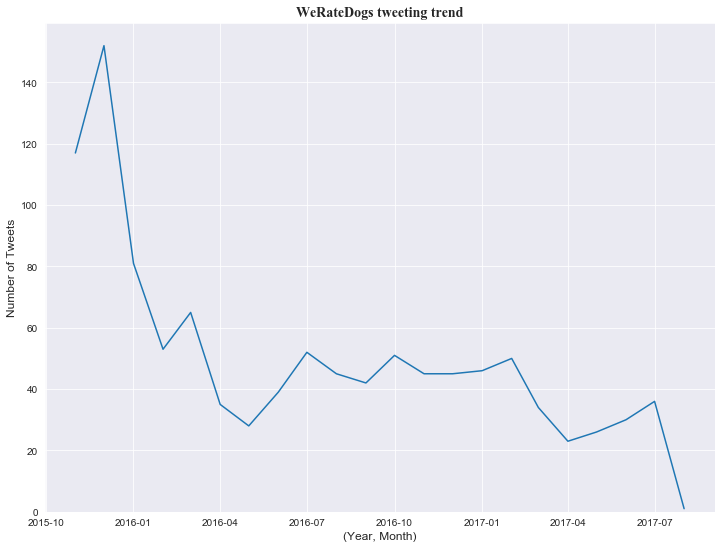

In [176]:
fig, ax = plt.subplots();
ax.plot(datetimes, y_values);
ax.set_xlabel("(Year, Month)",fontsize = 12);
ax.set_ylabel("Number of Tweets",fontsize = 12);
ax.set_title('WeRateDogs tweeting trend',fontsize = 14,
            fontname="Times New Roman",fontweight="bold");
ax.set_ylim(0, );
plt.savefig('tweet_trend');#Save figure for distribution and later use 

<a id='tweethour'></a>
## 2. Which hour(s) of the day people tweet the most
>Another interesting insight from this dataset is to find out whether there is a specific time period in which people tweet the most. Turns out that there are two favorite periods of time in which people posted more frequently, the first one in the afternoon between 4 - 5 pm and clearly late at night between 11 pm - 2 am.

In [177]:
tweets_per_hour = df.tweet_id.groupby([df["timestamp"].dt.hour]).count()
tweets_per_hour

timestamp
0     144
1     150
2     103
3      83
4      45
5      10
6       2
13      2
14      1
15     49
16    123
17    102
18     55
19     44
20     39
21     38
22     38
23     68
Name: tweet_id, dtype: int64

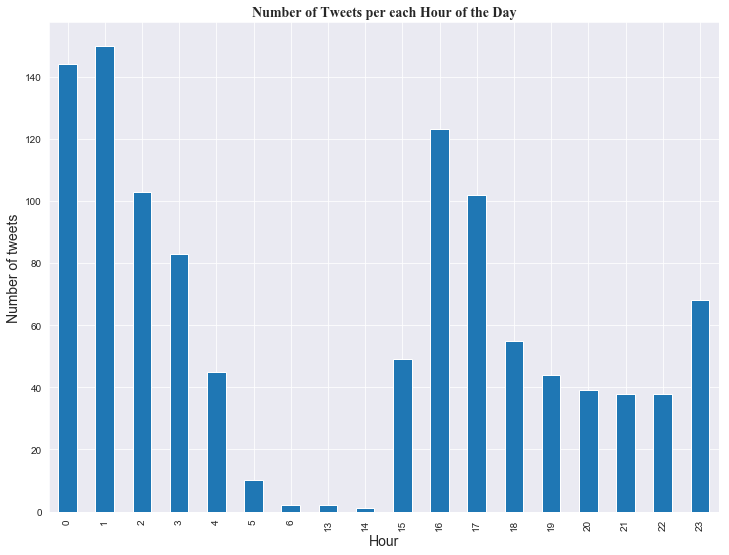

<Figure size 864x648 with 0 Axes>

In [161]:
base_color = sns.color_palette()[0]
tweets_per_hour.plot(kind='bar',color= base_color)
plt.xlabel('Hour',fontsize=14) 
plt.ylabel('Number of tweets',fontsize=14) 
plt.title('Number of Tweets per each Hour of the Day',fontsize=14,
          fontname="Times New Roman",fontweight="bold") 
plt.show()
plt.savefig('tweets_per_hour'); #Save figure for distribution and later use 

<a id='commonnamesbreeds'></a>
## 3. Most common dog names and breeds
>Based on the data, the top ten most common dog names in WeRateDogs are: Cooper, Tucker, Charlie, Olivier, Lucy, Penny, Daisy, Sadie, Bo and Jax. Checking the results for the breeds, it is clear that the Retriever breed in both of its versions namely Golden and Labrador, being first and second place, is the most common breed into the dataset.  

In [178]:
#Top 10 most common dog names
df.name.value_counts().head(10)

Cooper     10
Tucker      9
Charlie     9
Oliver      9
Lucy        8
Penny       8
Sadie       7
Daisy       7
Bo          7
Koda        6
Name: name, dtype: int64

In [179]:
#Top 10 most common breeds
df.breed.value_counts().head(10)

Golden_Retriever      102
Labrador_Retriever     69
Pembroke               65
Chihuahua              59
Pug                    42
Chow                   35
Toy_Poodle             29
Pomeranian             26
Samoyed                24
Malamute               23
Name: breed, dtype: int64

<a id='namebreedlikes'></a>
## 4. Dog names and breeds with the most likes
>Querying the dataset grouping by name and breed, turns out that the combination Stephan and Chihuahua results in the higher number of likes. Exploring only the quantity of likes by name, Bo and Stephan received the greater number of likes, being first and second place respectively. Checking by breed, again the Golden Retriever received the maximum number of likes, followed by Pembroke, Retriever again but this time the Labrador, followed by Chihuahua and French Bulldog. 

In [130]:
# Top 10 Dog names and breed with the most likes 
df.likes.groupby([df["name"],df["breed"]]).sum().sort_values(ascending=False).head(10)

name     breed                   
Stephan  Chihuahua                   125845
Jamesy   French_Bulldog              120939
Duddles  English_Springer            103175
Bo       Standard_Poodle              91432
Zoey     Golden_Retriever             81336
Aja      Chesapeake_Bay_Retriever     77751
Earl     Italian_Greyhound            75360
Bella    Golden_Retriever             72546
Lilly    Labrador_Retriever           69913
Canela   Pembroke                     67188
Name: likes, dtype: int64

In [131]:
#Names with the most likes
df.likes.groupby([df["name"]]).sum().sort_values(ascending=False).head(10)

name
Bo         130071
Stephan    125845
Jamesy     120939
Zoey       108445
Duddles    103175
Stanley     92798
Penny       90659
Gary        87814
Charlie     86512
Bella       85592
Name: likes, dtype: int64

In [132]:
#Top 20 Dog breeds with the most likes
top20_breeds = df.likes.groupby([df["breed"]]).sum().sort_values(ascending=True).tail(20) #better for plotting! 
top20_breeds

breed
Siberian_Husky                130735
Shetland_Sheepdog             130807
German_Shepherd               134364
Miniature_Pinscher            144132
Basset                        148500
Staffordshire_Bullterrier     168320
Chesapeake_Bay_Retriever      182341
Pomeranian                    182935
Malamute                      207897
Cardigan                      215580
Toy_Poodle                    219884
Samoyed                       227633
Cocker_Spaniel                246243
Pug                           261911
Chow                          274944
French_Bulldog                431477
Chihuahua                     546167
Labrador_Retriever            676497
Pembroke                      719215
Golden_Retriever             1220086
Name: likes, dtype: int64

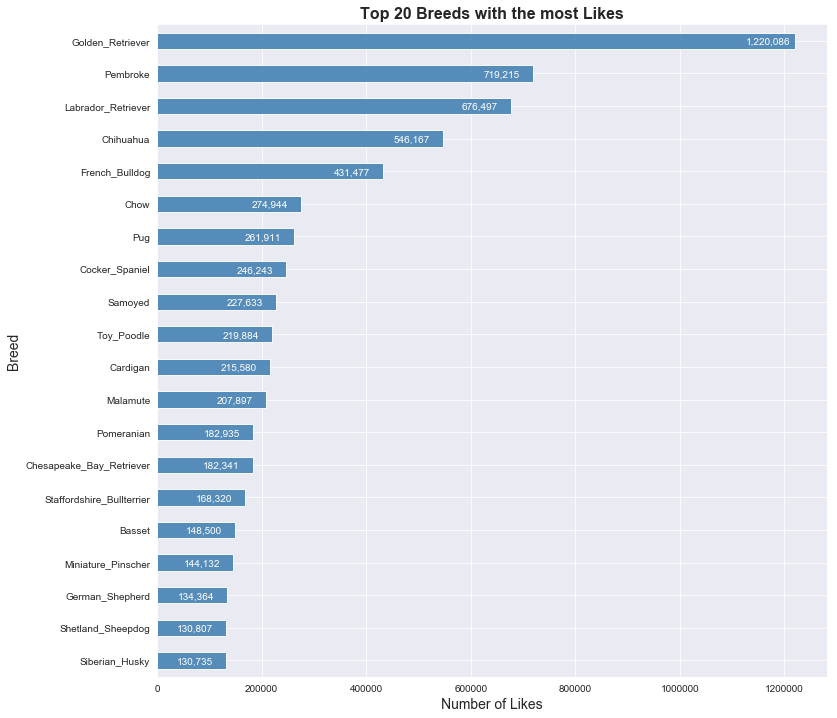

<Figure size 864x648 with 0 Axes>

In [133]:
#Visualization of dog breeds and number of likes
top20_breeds.plot(kind='barh',figsize=(12, 12),alpha=0.9, color='steelblue')
plt.xlabel('Number of Likes',fontsize = 14)
plt.ylabel('Breed',fontsize = 14)
plt.title('Top 20 Breeds with the most Likes',fontsize = 16,fontweight="bold")
# annotate value labels to each breed
for index, value in enumerate(top20_breeds): 
    label = format(int(value), ',') # format int with commas
    
    #place text at the end of bar (subtracting 94000 from x, and 0.1 from y to make it fit within the bar(trial and error!))
    plt.annotate(label, xy=(value - 94000, index - 0.10), color='white')

plt.show()

plt.savefig('Top20_breeds_likes'); #Save figure for distribution and later use 

<a id='wordclouds'></a>
## 5. Some Cool Visualizations using WordClouds!
> For the last part of this project, I decided to create two WordClouds. The first one is composed of all the words extracted from people comments on twitter and second one uses an artificially created word string consisting of the dog breeds duplicated according to the number of likes it received to create a WordCloud using a Retriever silhouette as a mask. 

In [134]:
#Top 20 Dog breeds with the most likes
breeds_by_likes = df.likes.groupby([df["breed"]]).sum().sort_values(ascending=False)

In [135]:
#Creating a dictionary with breeds as keys and likes as values
keys = breeds_by_likes.index
values = breeds_by_likes.values
breeds_dict = dict(zip(keys, values))

In [136]:
#Creating the word string for the word cloud
word_string =''
for breed, likes in breeds_dict.items():
    word_string = word_string + ((breed + ' ')*likes) #each breed gets duplicated based on the number of likes

In [137]:
#Creating the word string for the word cloud 
comments =''
for text in df.text.head():
    comments = comments +' '+ text #extracting words from the text in WeRateDogs comments.

In [31]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Gustavo\Anaconda3

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         184 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.8                |           py36_0         892 KB  conda-forge
    openssl-1.1.1b             |       hfa6e2cd_2         4.8 MB  conda-forge
    wordcloud-1.4.1            |           py36_0         154 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.1 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/win-64::wordcloud-1.4.1-py36_0

The following packages will be UPDATED:

  ca-certificates  

In [138]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [139]:
stopwords = set(STOPWORDS)

In [140]:
# add unwanted words to stopwords
stopwords.add('one') 
stopwords.add('shark') 

In [141]:
# creating the word cloud
wordcloud = WordCloud(background_color='white',stopwords=stopwords).generate(comments)
print('Word cloud created!')

Word cloud created!


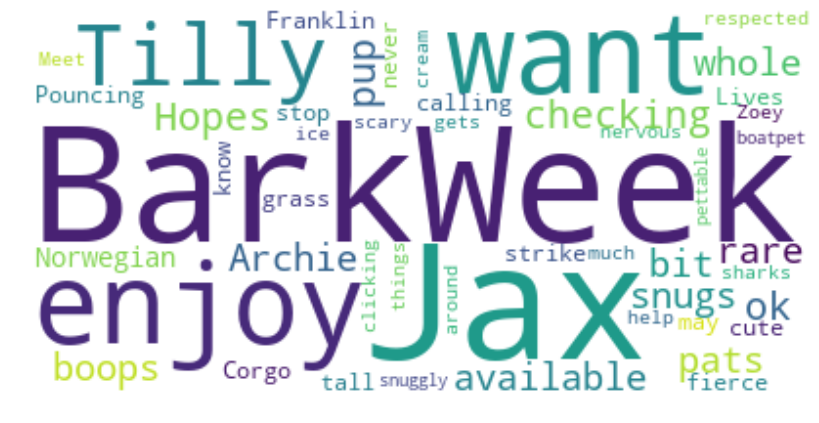

<Figure size 864x648 with 0 Axes>

In [142]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.savefig('Top20_breeds_WordCloud'); #Save figure for distribution and later use 

## Creating a WordCloud with people's comments on a Dog Silhouette

In [143]:
# Preparing Dog's Silhouette
from PIL import Image # converting images into arrays
dog_mask = np.array(Image.open('dog1_mask.jpg'))

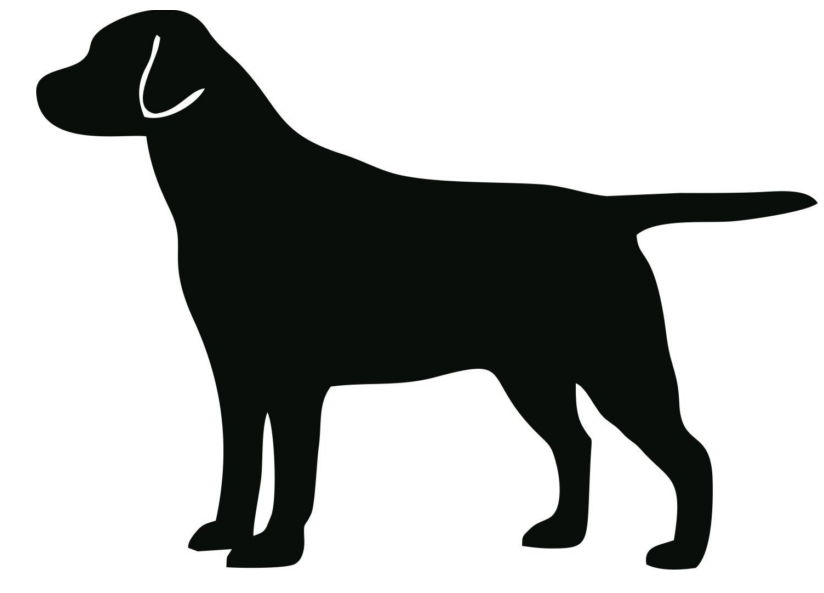

In [144]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(dog_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [145]:
#Creating the word string for the word cloud
comments =''
for text in df.text.head():
    comments = comments +' '+ text #each breed gets duplicated based on the number of likes

In [146]:
comments

' This is Tilly. She\'s just checking pup on you. Hopes you\'re doing ok. If not, she\'s available for pats, snugs, boops, the whole bit.  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. #BarkWeek  Meet Jax. He enjoys ice cream so much he gets nervous around it. help Jax enjoy more things by clicking below    This is Zoey. She doesn\'t want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. #BarkWeek '

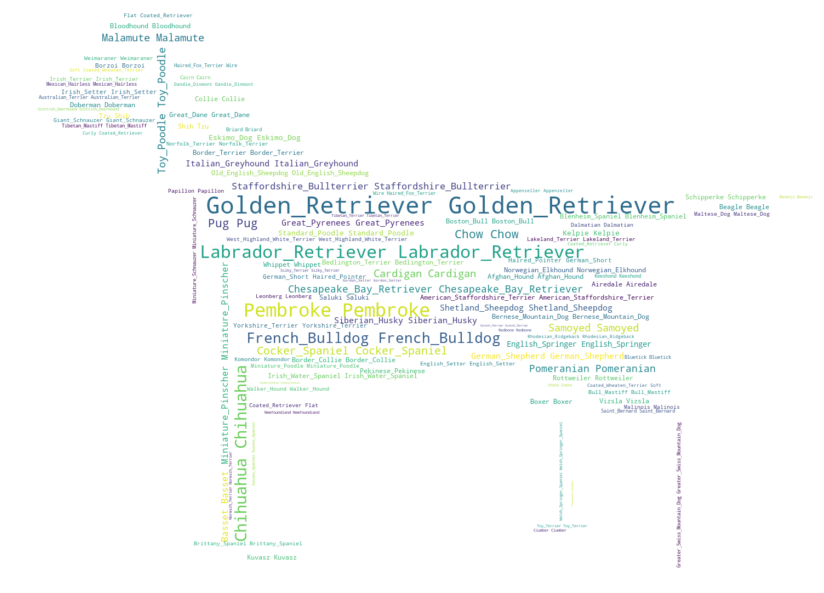

<Figure size 864x648 with 0 Axes>

In [147]:
# instantiate a word cloud object
dog_wc = WordCloud(background_color='white', mask = dog_mask, stopwords=stopwords)

# generate the word cloud
dog_wc.generate(word_string)

# display the word cloud
fig_dog = plt.figure()
fig_dog.set_figwidth(14) # set width
fig_dog.set_figheight(18) # set height

plt.imshow(dog_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('Top20_breeds_WordCloud'); #Save figure for distribution and later use 

In [158]:
#Code into a function for WordClouds generation using a Mask
def generate_wordcloud(words, mask):
    stopwords = set(STOPWORDS)
    # add unwanted words to stopwords
    stopwords.add('one') 
    stopwords.add('shark') 
    #Generating the word cloud
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=stopwords, mask=mask)
    word_cloud.generate(words)
    #Showing the wordcloud on a mask
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

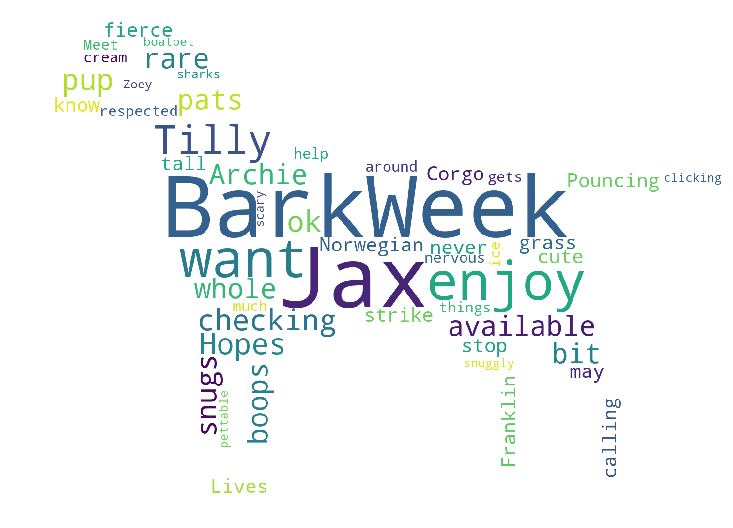

In [159]:
#Using people comments
generate_wordcloud(comments, dog_mask)